In [10]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('test_data/2021_fantasy_scores.csv')
data = data[['player_id','player_name','game_id','game_date','fantasy_score','fantasy_score_cumul']]

In [4]:
def game_interval(rn):
    if rn % 10 == 0:
        return rn // 10 - 1
    
    return rn // 10

data['rn'] = data.sort_values(by='game_date').groupby(['player_id']).cumcount()+1
data['ten_games'] = data.apply(lambda x: game_interval(x['rn']),axis=1)

In [12]:
grouped_games = data.groupby(['player_id','player_name','ten_games']).agg({'fantasy_score':['mean']})
grouped_games.columns = ['moving_10g_avg']
grouped_games = grouped_games.reset_index()

Player:  Al Horford


<AxesSubplot:xlabel='ten_games', ylabel='moving_10g_avg'>

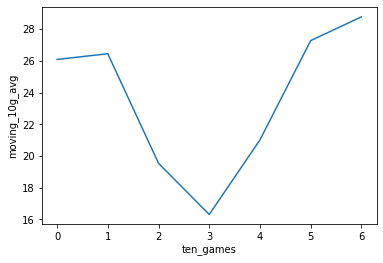

In [22]:
player = input('Player: ').lower()
sns.lineplot(data=grouped_games.loc[grouped_games['player_name'].str.lower() == player],x='ten_games',y='moving_10g_avg')